# Train with video

In [1]:
from experiment.experiment import Experiment
from experiment.spatial_utils import preprocessTarget, SpatialLoss, SpatialMapsGenerator, BatchGenerator
from models import spatial
from utils.common_utils import generateSyntheticTexture
import torch
dtype = torch.cuda.FloatTensor


config = {
    "PLOT": True,
    "optimizer": "adam",
    "lr": 1e-2,
    "num_iter": 250,
    "show_every": 100,
    "maps_number": 4,
    "input_size": 128,
    "output_size": 128,
    "video_length": 64
}

skip_params = {'num_input_channels': config['maps_number'],
               'num_channels_down': [8, 16, 24],
               'num_channels_up': [8, 16, 24],
               'num_channels_skip': [4, 4, 4]}

pregrid_params = {'num_input_channels': config['maps_number'],
                  'num_output_channels': 2,
                  'num_channels_down': [8, 16, 24],
                  'num_channels_up': [8, 16, 24],
                  'num_channels_skip': [4, 4, 4]}
config['net_params'] = [skip_params, pregrid_params]

net = spatial.Net(input_depth=config['maps_number'], pic_size=config['input_size'], skip_args_main=skip_params,
                  skip_args_grid=pregrid_params).type(dtype)


video = generateSyntheticTexture()
target = preprocessTarget(video, config["video_length"], config["output_size"])
loss = SpatialLoss()
spatial_maps_generator = SpatialMapsGenerator(config["maps_number"])
batch_generator = BatchGenerator(target, spatial_maps_generator, config[
                                 "input_size"], config["input_size"])

parameters = list(net.parameters())
for var in spatial_maps_generator.spatial_variables.values():
    parameters.append(var)

train_with_video = Experiment(config, parameters, batch_generator, net, loss)

Starting optimization with ADAM


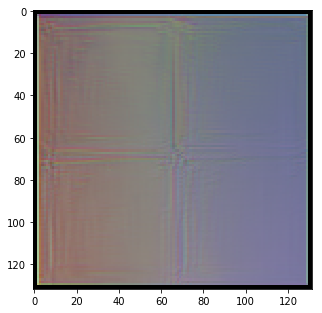

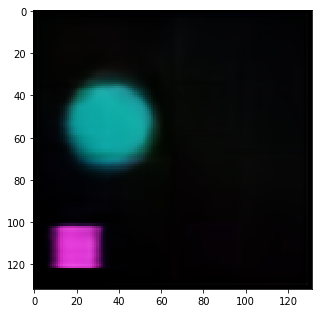

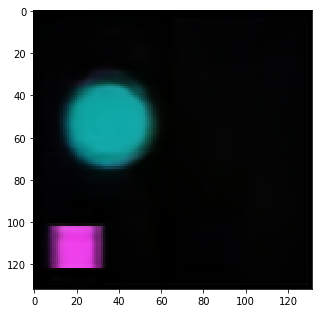

In [2]:
train_with_video.run()

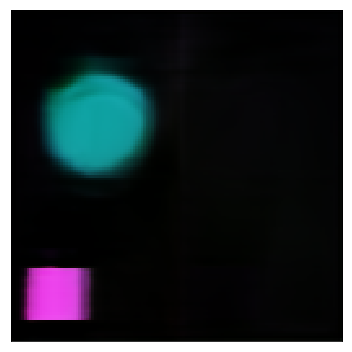

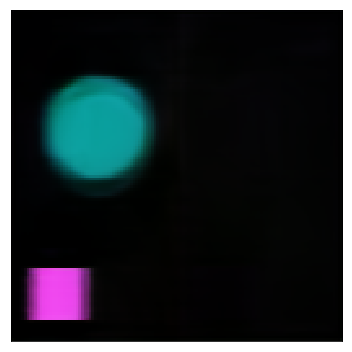

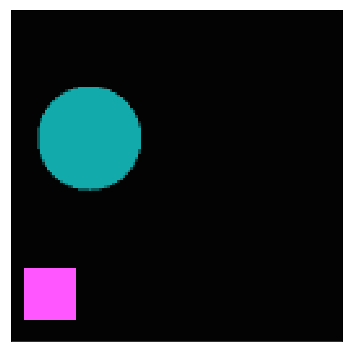

In [3]:
train_with_video.save_result();

In [4]:
train_with_video.path_ +"/fit.mp4"

'experiment_results/26_Mar_2018:14:49:38/fit.mp4'

In [5]:
%%HTML
<video width="320" height="240" controls loop>
  <source src='experiment_results/26_Mar_2018:14:49:38/fit.mp4' type="video/mp4">
</video>
<video width="320" height="240" controls loop>
  <source src='experiment_results/26_Mar_2018:14:49:38/predict.mp4' type="video/mp4">
</video>
<video width="320" height="240" controls loop>
  <source src='experiment_results/26_Mar_2018:14:49:38/target.mp4' type="video/mp4">
</video>

# Continue training with picture

In [6]:
from utils.common_utils import plotCircle, plotRectangle
import numpy as np

back_side = np.zeros((256, 256, 3))
image = plotCircle(back_side, vertex=(100, 40), size=40, color=(0.3, 0.5, 0.2))
image = plotRectangle(image, vertex=(200, 100), size=30, color=(0.7, 0.1, 0.1))
image = np.array([image])

config = {
    "PLOT": True,
    "optimizer": "adam",
    "lr": 1e-2,
    "num_iter": 500,
    "show_every": 100,
    "maps_number": 4,
    "input_size": 128,
    "output_size": 128,
    "video_length": 1
}

target = preprocessTarget(image, config["video_length"], config["output_size"])
batch_generator = BatchGenerator(target, spatial_maps_generator, config[
                                 "input_size"], config["input_size"])

parameters = list(net.context.parameters())
train_with_picture = Experiment(config, parameters, batch_generator, net, loss)

Starting optimization with ADAM


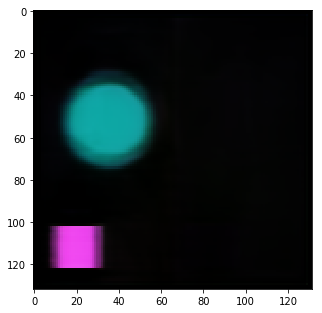

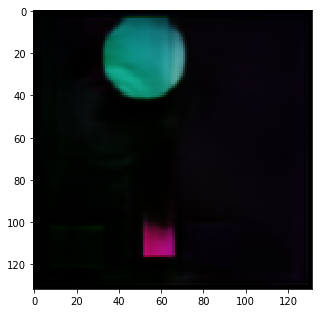

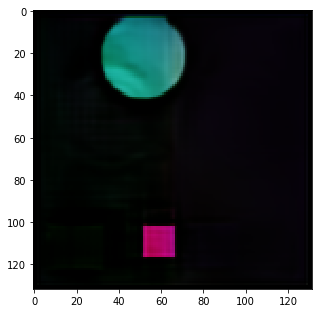

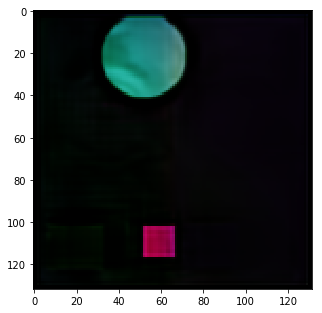

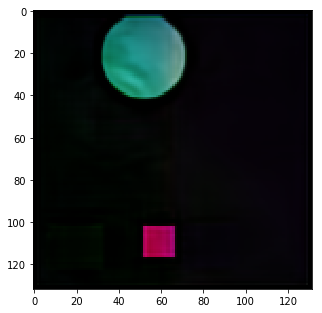

In [7]:
train_with_picture.run()

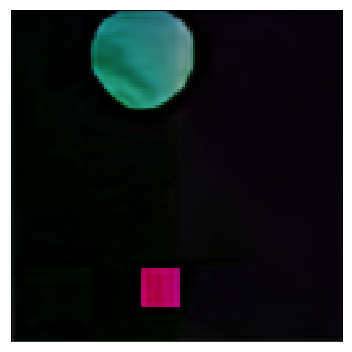

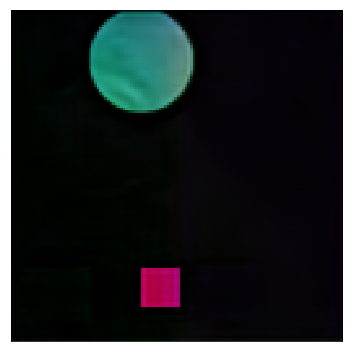

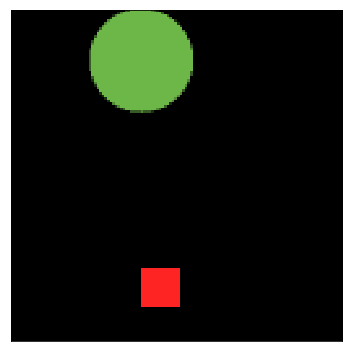

In [8]:
train_with_picture.save_result()

In [9]:
train_with_picture.path_ +"/fit.mp4"

'experiment_results/26_Mar_2018:14:51:27/fit.mp4'

In [10]:
%%HTML
<video width="320" height="240" controls loop>
  <source src='experiment_results/26_Mar_2018:14:51:27/fit.mp4' type="video/mp4">
</video>
<video width="320" height="240" controls loop>
  <source src='experiment_results/26_Mar_2018:14:51:27/predict.mp4' type="video/mp4">
</video>
<video width="320" height="240" controls loop>
  <source src='experiment_results/26_Mar_2018:14:51:27/target.mp4' type="video/mp4">
</video>